<a href="https://colab.research.google.com/github/HyunJW/Log_Analystic/blob/hyun_feat/%EC%A7%80%ED%95%98%EC%B2%A0_%EC%9D%B4%EC%9A%A9%ED%98%84%ED%99%A9_%EC%88%98%EC%A0%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 지하철 월별 시간대별 이용현황

In [210]:
import pandas as pd

# 그래프를 노트북 안에 그리기 위해 설정
%matplotlib inline

# 필요한 패키지와 라이브러리 가져온다.
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

# 폰트 지정하기
plt.rcParams['font.family'] = 'gulim'

In [211]:
def fix_font():
  import os
  import matplotlib as mpl
  import matplotlib.pyplot as plt
  os.system("apt-get install -y fonts-nanum")
  os.system("fc-cache -fv")
  mpl.font_manager._rebuild()
  findfont=mpl.font_manager.fontManager.findfont
  mpl.font_manager.findfont=findfont
  mpl.backends.backend_agg.findfont=findfont
  plt.rcParams["font.family"]="NanumBarunGothic"
  plt.rcParams["axes.unicode_minus"] = False


fix_font()

In [212]:
# 데이터 로드
df = pd.read_csv('./서울시 지하철 호선별 역별 시간대별 승하차 인원 정보.csv', encoding='cp949')

## 1. 데이터 확인 및 전처리

In [213]:
df.head()

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원,작업일자
0,202301,1호선,동대문,717,11,9399,1791,7814,5063,11183,...,7667,529,2104,5,254,0,0,0,0,20230203
1,202301,1호선,동묘앞,176,5,2429,929,3063,4244,5788,...,3400,80,1320,3,330,0,0,0,0,20230203
2,202301,1호선,서울역,555,27,6560,7430,11059,41800,36434,...,12316,3388,2777,69,235,0,5,0,0,20230203
3,202301,1호선,시청,95,0,2103,3753,3123,19320,6859,...,3160,353,703,1,22,0,0,0,0,20230203
4,202301,1호선,신설동,273,6,7568,1962,8198,6829,18129,...,7998,319,1941,3,28,1,0,0,0,20230203


In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56951 entries, 0 to 56950
Data columns (total 52 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   사용월           56951 non-null  int64 
 1   호선명           56951 non-null  object
 2   지하철역          56951 non-null  object
 3   04시-05시 승차인원  56951 non-null  int64 
 4   04시-05시 하차인원  56951 non-null  int64 
 5   05시-06시 승차인원  56951 non-null  int64 
 6   05시-06시 하차인원  56951 non-null  int64 
 7   06시-07시 승차인원  56951 non-null  int64 
 8   06시-07시 하차인원  56951 non-null  int64 
 9   07시-08시 승차인원  56951 non-null  int64 
 10  07시-08시 하차인원  56951 non-null  int64 
 11  08시-09시 승차인원  56951 non-null  int64 
 12  08시-09시 하차인원  56951 non-null  int64 
 13  09시-10시 승차인원  56951 non-null  int64 
 14  09시-10시 하차인원  56951 non-null  int64 
 15  10시-11시 승차인원  56951 non-null  int64 
 16  10시-11시 하차인원  56951 non-null  int64 
 17  11시-12시 승차인원  56951 non-null  int64 
 18  11시-12시 하차인원  56951 non-null  int64 
 19  12시-

In [215]:
# 사용월의 타입변경(int -> str)
df['사용월'] = df['사용월'].astype('str')

# 17~22년을 제외한 데이터 삭제
df.drop(df[(df['사용월'] < '201701') | (df['사용월'] >= '202201')].index, axis=0, inplace=True)

In [216]:
# 중복확인
df[df.duplicated(df.columns)]

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원,작업일자


In [217]:
# 1시~4시 사이의 데이터를 '1시 이후 승차', '1시 이후 하차'로 변경
df['1시이후 승차'] = df[['01시-02시 승차인원', '02시-03시 승차인원', '03시-04시 승차인원']].sum(axis=1)
df['1시이후 하차'] = df[['01시-02시 하차인원', '02시-03시 하차인원', '03시-04시 하차인원']].sum(axis=1)

In [218]:
# 필요없는 column 삭제
df.drop(['01시-02시 승차인원', '02시-03시 승차인원', '03시-04시 승차인원', 
         '01시-02시 하차인원', '02시-03시 하차인원', '03시-04시 하차인원', '작업일자'], axis=1, inplace=True)

In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35625 entries, 7965 to 43589
Data columns (total 47 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   사용월           35625 non-null  object
 1   호선명           35625 non-null  object
 2   지하철역          35625 non-null  object
 3   04시-05시 승차인원  35625 non-null  int64 
 4   04시-05시 하차인원  35625 non-null  int64 
 5   05시-06시 승차인원  35625 non-null  int64 
 6   05시-06시 하차인원  35625 non-null  int64 
 7   06시-07시 승차인원  35625 non-null  int64 
 8   06시-07시 하차인원  35625 non-null  int64 
 9   07시-08시 승차인원  35625 non-null  int64 
 10  07시-08시 하차인원  35625 non-null  int64 
 11  08시-09시 승차인원  35625 non-null  int64 
 12  08시-09시 하차인원  35625 non-null  int64 
 13  09시-10시 승차인원  35625 non-null  int64 
 14  09시-10시 하차인원  35625 non-null  int64 
 15  10시-11시 승차인원  35625 non-null  int64 
 16  10시-11시 하차인원  35625 non-null  int64 
 17  11시-12시 승차인원  35625 non-null  int64 
 18  11시-12시 하차인원  35625 non-null  int64 
 19  1

In [220]:
df.호선명.unique()

array(['1호선', '2호선', '3호선', '4호선', '5호선', '6호선', '7호선', '8호선', '9호선',
       '9호선2~3단계', '경강선', '경부선', '경원선', '경의선', '경인선', '경춘선', '공항철도 1호선',
       '과천선', '분당선', '수인선', '안산선', '우이신설선', '일산선', '장항선', '중앙선', '9호선2단계'],
      dtype=object)

### 1호선 전처리

In [221]:
# 1호선 역 이름 확인
df[(df['호선명'] == '1호선') | (df['호선명'] == '경원선') | (df['호선명'] == '경부선') | (df['호선명'] == '경인선') | (df['호선명'] == '장항선')].지하철역.unique()

array(['동대문', '동묘앞', '서울역', '시청', '신설동', '제기동', '종각', '종로3가', '종로5가',
       '청량리(서울시립대입구)', '가산디지털단지', '관악', '광명', '구로', '군포', '금정', '금천구청',
       '남영', '노량진', '당정', '대방', '독산', '두정', '명학', '병점', '서동탄', '서정리',
       '석수', '성균관대', '성환', '세류', '세마', '송탄', '수원', '신길', '신도림', '안양',
       '영등포', '오산', '오산대', '용산', '의왕', '직산', '진위', '천안', '평택', '평택지제',
       '화서', '가능', '광운대', '녹양', '녹천', '덕계', '덕정', '도봉', '도봉산', '동두천',
       '동두천중앙', '망월사', '방학', '보산', '서빙고', '석계', '소요산', '신이문', '양주', '옥수',
       '왕십리(성동구청)', '외대앞', '월계', '응봉', '의정부', '이촌(국립중앙박물관)', '지행', '창동',
       '한남', '회룡', '간석', '개봉', '구일', '도원', '도화', '동암', '동인천', '백운', '부개',
       '부천', '부평', '소사', '송내', '역곡', '오류동', '온수(성공회대입구)', '인천', '제물포',
       '주안', '중동', '배방', '봉명', '신창(순천향대)', '쌍용(나사렛대)', '아산', '온양온천', '탕정',
       '지제'], dtype=object)

In [222]:
# 1호선 역의 개수 확인
df[(df['호선명'] == '1호선') | (df['호선명'] == '경원선') | (df['호선명'] == '경부선') | (df['호선명'] == '경인선') | (df['호선명'] == '장항선')].지하철역.nunique()

105

In [223]:
# 다르게 표기된 역 이름 수정(지제 -> 평택지제)
df.replace('지제', '평택지제', inplace=True)

In [224]:
# 잘못된 호선 수정
df.loc[(df['지하철역'] == '청량리(서울시립대입구)') & (df['호선명'] == '경원선'), '호선명'] = '중앙선'
df.loc[(df['지하철역'] == '이촌(국립중앙박물관)') & (df['호선명'] == '경원선'), '호선명'] = '중앙선'
df.loc[(df['지하철역'] == '왕십리(성동구청)') & (df['호선명'] == '경원선'), '호선명'] = '중앙선'
df.loc[(df['지하철역'] == '옥수') & (df['호선명'] == '경원선'), '호선명'] = '중앙선'
df.loc[(df['지하철역'] == '한남') & (df['호선명'] == '경원선'), '호선명'] = '중앙선'
df.loc[(df['지하철역'] == '응봉') & (df['호선명'] == '경원선'), '호선명'] = '중앙선'
df.loc[(df['지하철역'] == '서빙고') & (df['호선명'] == '경원선'), '호선명'] = '중앙선'

In [225]:
# 중복일이 있는지 확인
print(df[(df['지하철역'].str.contains('지제'))].사용월.count())
print(df[(df['지하철역'].str.contains('청량리')) & (df['호선명'] == '중앙선')].사용월.count())
print(df[(df['지하철역'].str.contains('이촌')) & (df['호선명'] == '중앙선')].사용월.count())
print(df[(df['지하철역'].str.contains('왕십리')) & (df['호선명'] == '중앙선')].사용월.count())
print(df[(df['지하철역'].str.contains('옥수')) & (df['호선명'] == '중앙선')].사용월.count())
print(df[(df['지하철역'].str.contains('한남')) & (df['호선명'] == '중앙선')].사용월.count())
print(df[(df['지하철역'].str.contains('응봉')) & (df['호선명'] == '중앙선')].사용월.count())
print(df[(df['지하철역'].str.contains('서빙고')) & (df['호선명'] == '중앙선')].사용월.count())

60
60
60
60
60
60
60
60


In [226]:
# 수정된 역의 개수 확인
df[(df['호선명'] == '1호선') | (df['호선명'] == '경원선') | (df['호선명'] == '경부선') | (df['호선명'] == '경인선') | (df['호선명'] == '장항선')].지하철역.nunique()

98

In [227]:
# 회기역이 중앙선으로 빠짐
df.loc[(df['지하철역'].str.contains('회기'))].호선명.unique()

array(['중앙선'], dtype=object)

In [228]:
# '경원선', '경부선', '경인선', '장항선' -> 1호선
df.replace(['경원선', '경부선', '경인선', '장항선'], '1호선', inplace=True)

### 2호선 전처리

In [229]:
# 2호선 역 이름 확인
df[(df['호선명'] == '2호선')].지하철역.unique()

array(['강남', '강변(동서울터미널)', '건대입구', '교대(법원.검찰청)', '구로디지털단지', '구의(광진구청)',
       '낙성대(강감찬)', '당산', '대림(구로구청)', '도림천', '동대문역사문화공원(DDP)', '뚝섬', '문래',
       '방배', '봉천', '사당', '삼성(무역센터)', '상왕십리', '서울대입구(관악구청)', '서초', '선릉',
       '성수', '시청', '신답', '신당', '신대방', '신도림', '신림', '신설동', '신정네거리', '신촌',
       '아현', '양천구청', '역삼', '영등포구청', '왕십리(성동구청)', '용답', '용두(동대문구청)',
       '을지로3가', '을지로4가', '을지로입구', '이대', '잠실(송파구청)', '잠실나루', '잠실새내',
       '종합운동장', '충정로(경기대입구)', '한양대', '합정', '홍대입구', '낙성대', '동대문역사문화공원'],
      dtype=object)

In [230]:
# 2호선 역의 개수 확인
df[(df['호선명'] == '2호선')].지하철역.nunique()

52

In [231]:
# 다르게 표기된 역 이름 수정
df.replace('낙성대(강감찬)', '낙성대', inplace=True)
df.replace('동대문역사문화공원(DDP)', '동대문역사문화공원', inplace=True)

In [232]:
# 중복일이 있는지 확인
print(df[(df['지하철역'].str.contains('낙성대')) & (df['호선명'] == '2호선')].사용월.count())
print(df[(df['지하철역'].str.contains('동대문역사')) & (df['호선명'] == '2호선')].사용월.count())

60
60


In [233]:
# 수정된 역의 개수 확인
df[(df['호선명'] == '2호선')].지하철역.nunique()

50

### 3호선 전처리

In [234]:
# 3호선 역 이름 확인
df[(df['호선명'] == '3호선') | (df['호선명'] == '일산선')].지하철역.unique()

array(['가락시장', '경복궁(정부서울청사)', '경찰병원', '고속터미널', '교대(법원.검찰청)', '구파발', '금호',
       '남부터미널(예술의전당)', '녹번', '대청', '대치', '도곡', '독립문', '동대입구', '매봉', '무악재',
       '불광', '수서', '신사', '안국', '압구정', '약수', '양재(서초구청)', '연신내', '오금', '옥수',
       '을지로3가', '일원', '잠원', '종로3가', '지축', '충무로', '학여울', '홍제', '대곡', '대화',
       '마두', '백석', '삼송', '원당', '원흥', '정발산', '주엽', '화정'], dtype=object)

In [235]:
# 3호선 역의 개수 확인
df[(df['호선명'] == '3호선') | (df['호선명'] == '일산선')].지하철역.nunique()

44

In [236]:
# '일산선' -> 3호선
df.replace('일산선', '3호선', inplace=True)

### 4호선 전처리

In [237]:
# 4호선 역 이름 확인
df[(df['호선명'] == '4호선') | (df['호선명'] == '안산선') | (df['호선명'] == '과천선')].지하철역.unique()

array(['길음', '남태령', '노원', '당고개', '동대문', '동대문역사문화공원', '동작(현충원)', '명동',
       '미아(서울사이버대학)', '미아사거리', '사당', '삼각지', '상계', '서울역', '성신여대입구(돈암)',
       '수유(강북구청)', '숙대입구(갈월)', '신용산', '쌍문', '이촌(국립중앙박물관)', '창동',
       '총신대입구(이수)', '충무로', '한성대입구(삼선교)', '혜화', '회현(남대문시장)', '경마공원', '과천',
       '대공원', '범계', '선바위', '인덕원', '정부과천청사', '평촌', '고잔', '대야미', '반월', '산본',
       '상록수', '수리산', '신길온천', '안산', '오이도', '정왕', '중앙', '초지', '한대앞'],
      dtype=object)

In [238]:
# 4호선 역의 개수 확인
df[(df['호선명'] == '4호선') | (df['호선명'] == '안산선') | (df['호선명'] == '과천선')].지하철역.nunique()

47

In [239]:
# 다르게 표기된 역 이름 수정
df.replace('미아(서울사이버대학)', '미아', inplace=True)
df.replace('성신여대입구(돈암)', '성신여대입구', inplace=True)

In [240]:
# 중복일이 있는지 확인
print(df[(df['지하철역'].str.contains('미아')) & (df['호선명'] == '4호선')].사용월.count()) # 미아사거리도 포함
print(df[(df['지하철역'].str.contains('성신여대')) & (df['호선명'] == '4호선')].사용월.count())

120
60


In [241]:
# 수정된 역의 개수 확인
df[(df['호선명'] == '4호선') | (df['호선명'] == '안산선') | (df['호선명'] == '과천선')].지하철역.nunique()

47

In [242]:
# 금정역이 1호선으로 빠짐
df.loc[(df['지하철역'].str.contains('금정'))].호선명.unique()

array(['1호선'], dtype=object)

In [243]:
# '안산선','과천선' -> 4호선
df.replace(['안산선','과천선'], '4호선', inplace=True)

### 5호선 전처리

In [244]:
# 5호선 역 이름 확인
df[(df['호선명'] == '5호선') | (df['호선명'] == '하남선')].지하철역.unique()

array(['강동', '강일', '개롱', '개화산', '거여', '고덕', '공덕', '광나루(장신대)',
       '광화문(세종문화회관)', '군자(능동)', '굽은다리(강동구민회관앞)', '길동', '김포공항', '까치산',
       '답십리', '동대문역사문화공원', '둔촌동', '마곡', '마장', '마천', '마포', '명일', '목동',
       '미사', '발산', '방이', '방화', '상일동', '서대문', '송정', '신금호', '신길', '신정(은행정)',
       '아차산(어린이대공원후문)', '애오개', '양평', '여의나루', '여의도', '영등포구청', '영등포시장',
       '오금', '오목교(목동운동장앞)', '올림픽공원(한국체대)', '왕십리(성동구청)', '우장산', '을지로4가',
       '장한평', '종로3가', '천호(풍납토성)', '청구', '충정로(경기대입구)', '하남검단산',
       '하남시청(덕풍?신장)', '하남풍산', '행당', '화곡'], dtype=object)

In [245]:
# 5호선 역의 개수 확인
df[(df['호선명'] == '5호선') | (df['호선명'] == '하남선')].지하철역.nunique()

56

In [246]:
# 이상하게 표기된 역 이름 수정
df.replace('하남시청(덕풍?신장)', '하남시청', inplace=True)

In [247]:
# '하남선' -> 5호선
df.replace('하남선', '5호선', inplace=True)

### 6호선 전처리

In [248]:
# 6호선 역 이름 확인
df[(df['호선명'] == '6호선')].지하철역.unique()

array(['고려대(종암)', '공덕', '광흥창(서강)', '구산', '녹사평(용산구청)', '대흥(서강대앞)', '독바위',
       '돌곶이', '동묘앞', '디지털미디어시티', '마포구청', '망원', '버티고개', '보문', '봉화산(서울의료원)',
       '불광', '삼각지', '상수', '상월곡(한국과학기술연구원)', '새절(신사)', '석계', '신내', '신당',
       '안암(고대병원앞)', '약수', '역촌', '연신내', '월곡(동덕여대)', '월드컵경기장(성산)', '응암',
       '이태원', '증산(명지대앞)', '창신', '청구', '태릉입구', '한강진', '합정', '화랑대(서울여대입구)',
       '효창공원앞'], dtype=object)

In [249]:
# 6호선 역의 개수 확인
df[(df['호선명'] == '6호선')].지하철역.nunique()

39

### 7호선 전처리

In [250]:
# 7호선 역 이름 확인
df[(df['호선명'] == '7호선')].지하철역.unique()

array(['가산디지털단지', '강남구청', '건대입구', '고속터미널', '공릉(서울과학기술대)', '광명사거리',
       '군자(능동)', '굴포천', '까치울', '남구로', '남성', '내방', '노원', '논현', '대림(구로구청)',
       '도봉산', '뚝섬유원지', '마들', '먹골', '면목', '반포', '보라매', '부천시청', '부천종합운동장',
       '부평구청', '사가정', '삼산체육관', '상도', '상동', '상봉(시외버스터미널)', '수락산',
       '숭실대입구(살피재)', '신대방삼거리', '신중동', '신풍', '어린이대공원(세종대)', '온수(성공회대입구)',
       '용마산(용마폭포공원)', '이수', '장승배기', '장암', '중계', '중곡', '중화', '천왕', '철산',
       '청담', '춘의', '태릉입구', '하계', '학동', '용마산'], dtype=object)

In [251]:
# 7호선 역의 개수 확인
df[(df['호선명'] == '7호선')].지하철역.nunique()

52

In [252]:
# 다르게 표기된 역 이름 수정(용마산(용마폭포공원) -> 용마산)
df.replace('용마산(용마폭포공원)', '용마산', inplace=True)

In [253]:
# 수정된 역의 개수 확인
df[(df['호선명'] == '7호선')].지하철역.nunique()

51

### 8호선 전처리

In [254]:
# 8호선 역 이름 확인
df[(df['호선명'] == '8호선')].지하철역.unique()

array(['가락시장', '강동구청', '남위례', '남한산성입구(성남법원.검찰청)', '단대오거리', '모란',
       '몽촌토성(평화의문)', '문정', '복정', '산성', '석촌', '송파', '수진', '신흥', '암사',
       '잠실(송파구청)', '장지', '천호(풍납토성)'], dtype=object)

In [255]:
# 8호선 역의 개수 확인
df[(df['호선명'] == '8호선')].지하철역.nunique()

18

### 9호선 전처리

In [256]:
# 9호선 역 이름 확인
df[(df['호선명'] == '9호선') | (df['호선명'] == '9호선2~3단계') | (df['호선명'] == '9호선2단계')].지하철역.unique()

array(['가양', '개화', '고속터미널', '공항시장', '구반포', '국회의사당', '김포공항', '노들', '노량진',
       '당산', '동작(현충원)', '등촌', '마곡나루(서울식물원)', '사평', '샛강', '선유도', '신논현',
       '신목동', '신반포', '신방화', '양천향교', '여의도', '염창', '증미', '흑석(중앙대입구)',
       '둔촌오륜', '봉은사', '삼성중앙', '삼전', '석촌', '석촌고분', '선정릉', '송파나루', '언주',
       '올림픽공원(한국체대)', '종합운동장', '중앙보훈병원', '한성백제', '마곡나루'], dtype=object)

In [257]:
# 9호선 역의 개수 확인
df[(df['호선명'] == '9호선') | (df['호선명'] == '9호선2~3단계') | (df['호선명'] == '9호선2단계')].지하철역.nunique()

39

In [258]:
# 다르게 표기된 역 이름 수정
df.replace('마곡나루(서울식물원)', '마곡나루', inplace=True)

In [259]:
# 중복일이 있는지 확인
print(df[(df['지하철역'].str.contains('마곡나루')) & (df['호선명'].str.contains('9호선'))].사용월.count())
print(df[(df['지하철역'].str.contains('종합운동장')) & (df['호선명'].str.contains('9호선'))].사용월.count())

60
60


In [260]:
# 수정된 역의 개수 확인
df[(df['호선명'] == '9호선') | (df['호선명'] == '9호선2~3단계') | (df['호선명'] == '9호선2단계')].지하철역.nunique()

38

In [261]:
df.replace(['9호선2~3단계','9호선2단계'], '9호선', inplace=True)

## 2. 열차 혼잡도가 가장 높은 시간대 분석

### 1. 호선별로 가장 많이 승차하는 역은?

In [262]:
df_in = df.groupby(['호선명', '지하철역'], group_keys=False)[df.columns[df.columns.str.contains('승차')]].mean()
df_in.head()

04시-05시 승차인원  05시-06시 승차인원  06시-07시 승차인원  07시-08시 승차인원  \
호선명 지하철역                                                              
1호선 가능         378.566667   7903.966667  12657.900000  24975.150000   
    가산디지털단지   1340.000000   8205.400000   7914.766667  14763.350000   
    간석         375.650000   5440.366667  11762.750000  26198.050000   
    개봉        1226.050000  18414.966667  36569.333333  95251.200000   
    관악         187.150000   6983.550000  13008.033333  34716.916667   

             08시-09시 승차인원  09시-10시 승차인원  10시-11시 승차인원  11시-12시 승차인원  \
호선명 지하철역                                                              
1호선 가능           23638.50  15203.016667  12468.350000  11413.266667   
    가산디지털단지      14539.55  11594.316667  10380.716667  10997.616667   
    간석           22571.60  12716.833333   9789.983333   9361.316667   
    개봉           90883.65  54553.400000  38545.633333  34222.066667   
    관악           33257.35  17020.783333  11564.533333  10261.366667   

             12시-13시 승차인원  13시-14시 승차인원  ...  16시-17시 승차인원  17시-18시 승차인원  \
호선명 지하철역                                 ...                               
1호선 가능       11396.200000  10297.183333  ...   9408.133333  11904.933333   
    가산디지털단지  12513.066667  14100.000000  ...  21071.616667  50636.116667   
    간석        9559.716667   9258.916667  ...   8938.200000   9440.016667   
    개봉       35046.450000  33677.733333  ...  30417.050000  32939.283333   
    관악       12046.166667  11519.200000  ...  12228.200000  13637.950000   

              18시-19시 승차인원  19시-20시 승차인원  20시-21시 승차인원  21시-22시 승차인원  \
호선명 지하철역                                                               
1호선 가능        10438.883333   6907.316667   5042.433333   4362.666667   
    가산디지털단지  110261.866667  49507.783333  29847.500000  25568.883333   
    간석         9900.700000   6011.500000   4716.033333   4322.416667   
    개봉        33536.800000  21150.850000  16104.250000  14619.383333   
    관악        12179.150000   7554.000000   5467.800000   5186.383333   

             22시-23시 승차인원  23시-24시 승차인원  00시-01시 승차인원   1시이후 승차  
호선명 지하철역                                                         
1호선 가능        3276.916667   1441.250000    112.983333  0.050000  
    가산디지털단지  17028.533333   6963.900000    182.500000  0.700000  
    간석        3165.583333   1666.233333    146.683333  0.116667  
    개봉       10667.933333   4663.666667    175.616667  0.300000  
    관악        3273.933333   1254.416667     52.500000  0.066667  

[5 rows x 22 columns]

In [263]:
# column에서 승차인원 제거
df_in.columns = df_in.columns.str.split(' ').str[0]

In [264]:
# df에 하루 총 승차인원 column추가
df_in['총 승차인원'] = df_in.sum(axis=1)
df_in.head()

04시-05시       05시-06시       06시-07시       07시-08시   08시-09시  \
호선명 지하철역                                                                       
1호선 가능        378.566667   7903.966667  12657.900000  24975.150000  23638.50   
    가산디지털단지  1340.000000   8205.400000   7914.766667  14763.350000  14539.55   
    간석        375.650000   5440.366667  11762.750000  26198.050000  22571.60   
    개봉       1226.050000  18414.966667  36569.333333  95251.200000  90883.65   
    관악        187.150000   6983.550000  13008.033333  34716.916667  33257.35   

                  09시-10시       10시-11시       11시-12시       12시-13시  \
호선명 지하철역                                                              
1호선 가능       15203.016667  12468.350000  11413.266667  11396.200000   
    가산디지털단지  11594.316667  10380.716667  10997.616667  12513.066667   
    간석       12716.833333   9789.983333   9361.316667   9559.716667   
    개봉       54553.400000  38545.633333  34222.066667  35046.450000   
    관악       17020.783333  11564.533333  10261.366667  12046.166667   

                  13시-14시  ...       17시-18시        18시-19시       19시-20시  \
호선명 지하철역                   ...                                              
1호선 가능       10297.183333  ...  11904.933333   10438.883333   6907.316667   
    가산디지털단지  14100.000000  ...  50636.116667  110261.866667  49507.783333   
    간석        9258.916667  ...   9440.016667    9900.700000   6011.500000   
    개봉       33677.733333  ...  32939.283333   33536.800000  21150.850000   
    관악       11519.200000  ...  13637.950000   12179.150000   7554.000000   

                  20시-21시       21시-22시       22시-23시      23시-24시  \
호선명 지하철역                                                             
1호선 가능        5042.433333   4362.666667   3276.916667  1441.250000   
    가산디지털단지  29847.500000  25568.883333  17028.533333  6963.900000   
    간석        4716.033333   4322.416667   3165.583333  1666.233333   
    개봉       16104.250000  14619.383333  10667.933333  4663.666667   
    관악        5467.800000   5186.383333   3273.933333  1254.416667   

                00시-01시      1시이후         총 승차인원  
호선명 지하철역                                          
1호선 가능       112.983333  0.050000  201486.200000  
    가산디지털단지  182.500000  0.700000  448042.516667  
    간석       146.683333  0.116667  181198.750000  
    개봉       175.616667  0.300000  659822.750000  
    관악        52.500000  0.066667  232469.550000  

[5 rows x 23 columns]

In [265]:
# 하루 총 탑승객이 300보다 작은 일자의 데이터 삭제
df_in.drop(df_in[df_in['총 승차인원']<=300].index, axis=0, inplace=True)

In [266]:
# 그래프를 그리기 위한 변수 생성
x1, x2, x3 = [], [], []

# 각 호선별 총 승차인원 top5 출력
for i in range(1, 10):
    df_in_i = df_in.xs(f'{i}호선',level='호선명').sort_values('총 승차인원', ascending=False).head(5)
    
    print(f'{i}호선')
    print(df_in_i[['총 승차인원']])
    print('-------------------------------------')
    
    # 그래프 값 저장
    x1.append(f'{i}호선')
    x2.append(df_in_i.index[0])
    x3.append(df_in_i['총 승차인원'][0])
    
    # 각 호선별 승차인원이 가장 많은 역저장
    globals()["df_in_{}".format(i)] = df_in.xs(f'{i}호선',level='호선명').sort_values('총 승차인원', ascending=False).head(5)

1호선
            총 승차인원
지하철역              
영등포   1.313540e+06
수원    1.217994e+06
종각    1.144827e+06
용산    1.102222e+06
부천    1.090171e+06
-------------------------------------
2호선
                총 승차인원
지하철역                  
강남        2.671963e+06
잠실(송파구청)  2.298056e+06
홍대입구      2.008077e+06
신림        1.931418e+06
구로디지털단지   1.730418e+06
-------------------------------------
3호선
                    총 승차인원
지하철역                      
고속터미널         1.566454e+06
연신내           1.158865e+06
양재(서초구청)      1.097445e+06
남부터미널(예술의전당)  9.270609e+05
압구정           9.238327e+05
-------------------------------------
4호선
                총 승차인원
지하철역                  
혜화        1.084945e+06
수유(강북구청)  1.083468e+06
쌍문        9.063570e+05
명동        8.980246e+05
미아사거리     8.477693e+05
-------------------------------------
5호선
                    총 승차인원
지하철역                      
광화문(세종문화회관)  941533.816667
까치산          844665.233333
화곡           827380.350000
오목교(목동운동장앞)  669127.050000
여의도          663555.48

In [267]:
# 호선별 가장 많이 승차하는 역을 데이터 프레임으로 저장
df_in_max = pd.DataFrame({'호선명' : x1, '지하철역' : x2, '총 승차인원' : x3})

In [268]:
df_in_max

,호선명,지하철역,총 승차인원
0,1호선,영등포,1.313540e+06
1,2호선,강남,2.671963e+06
2,3호선,고속터미널,1.566454e+06
3,4호선,혜화,1.084945e+06
4,5호선,광화문(세종문화회관),9.415338e+05
5,6호선,응암,5.051695e+05
6,7호선,가산디지털단지,1.134524e+06
7,8호선,암사,5.227060e+05
8,9호선,신논현,8.693739e+05


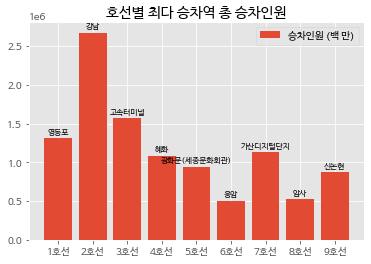

In [269]:
# 그래프
plt.style.use('ggplot')
plt.bar(df_in_max['호선명'],df_in_max['총 승차인원'], label="승차인원 (백 만)")
for i in range(0,9):
    plt.text(i,df_in_max.iloc[i]['총 승차인원']+80000,df_in_max.iloc[i]['지하철역'], va='center', ha='center', size=8)

plt.legend()
plt.title('호선별 최다 승차역 총 승차인원')

plt.show()

- 이 역의 가장 혼잡한 시간대는?

In [270]:
df_in_cheonho = df_in_8.iloc[[2]].T[:-1]
df_in_cheonho.columns = ['승차인원']

In [271]:
# 그래프를 그리기 위한 전치, column이름 변경
df_in_1 = df_in_1.iloc[[0]].T[:-1]
df_in_1.columns = ['승차인원']

df_in_2 = df_in_2.iloc[[0]].T[:-1]
df_in_2.columns = ['승차인원']

df_in_3 = df_in_3.iloc[[0]].T[:-1]
df_in_3.columns = ['승차인원']

df_in_4 = df_in_4.iloc[[0]].T[:-1]
df_in_4.columns = ['승차인원']

df_in_5 = df_in_5.iloc[[0]].T[:-1]
df_in_5.columns = ['승차인원']

df_in_6 = df_in_6.iloc[[0]].T[:-1]
df_in_6.columns = ['승차인원']

df_in_7 = df_in_7.iloc[[0]].T[:-1]
df_in_7.columns = ['승차인원']

df_in_8 = df_in_8.iloc[[0]].T[:-1]
df_in_8.columns = ['승차인원']

df_in_9 = df_in_9.iloc[[0]].T[:-1]
df_in_9.columns = ['승차인원']

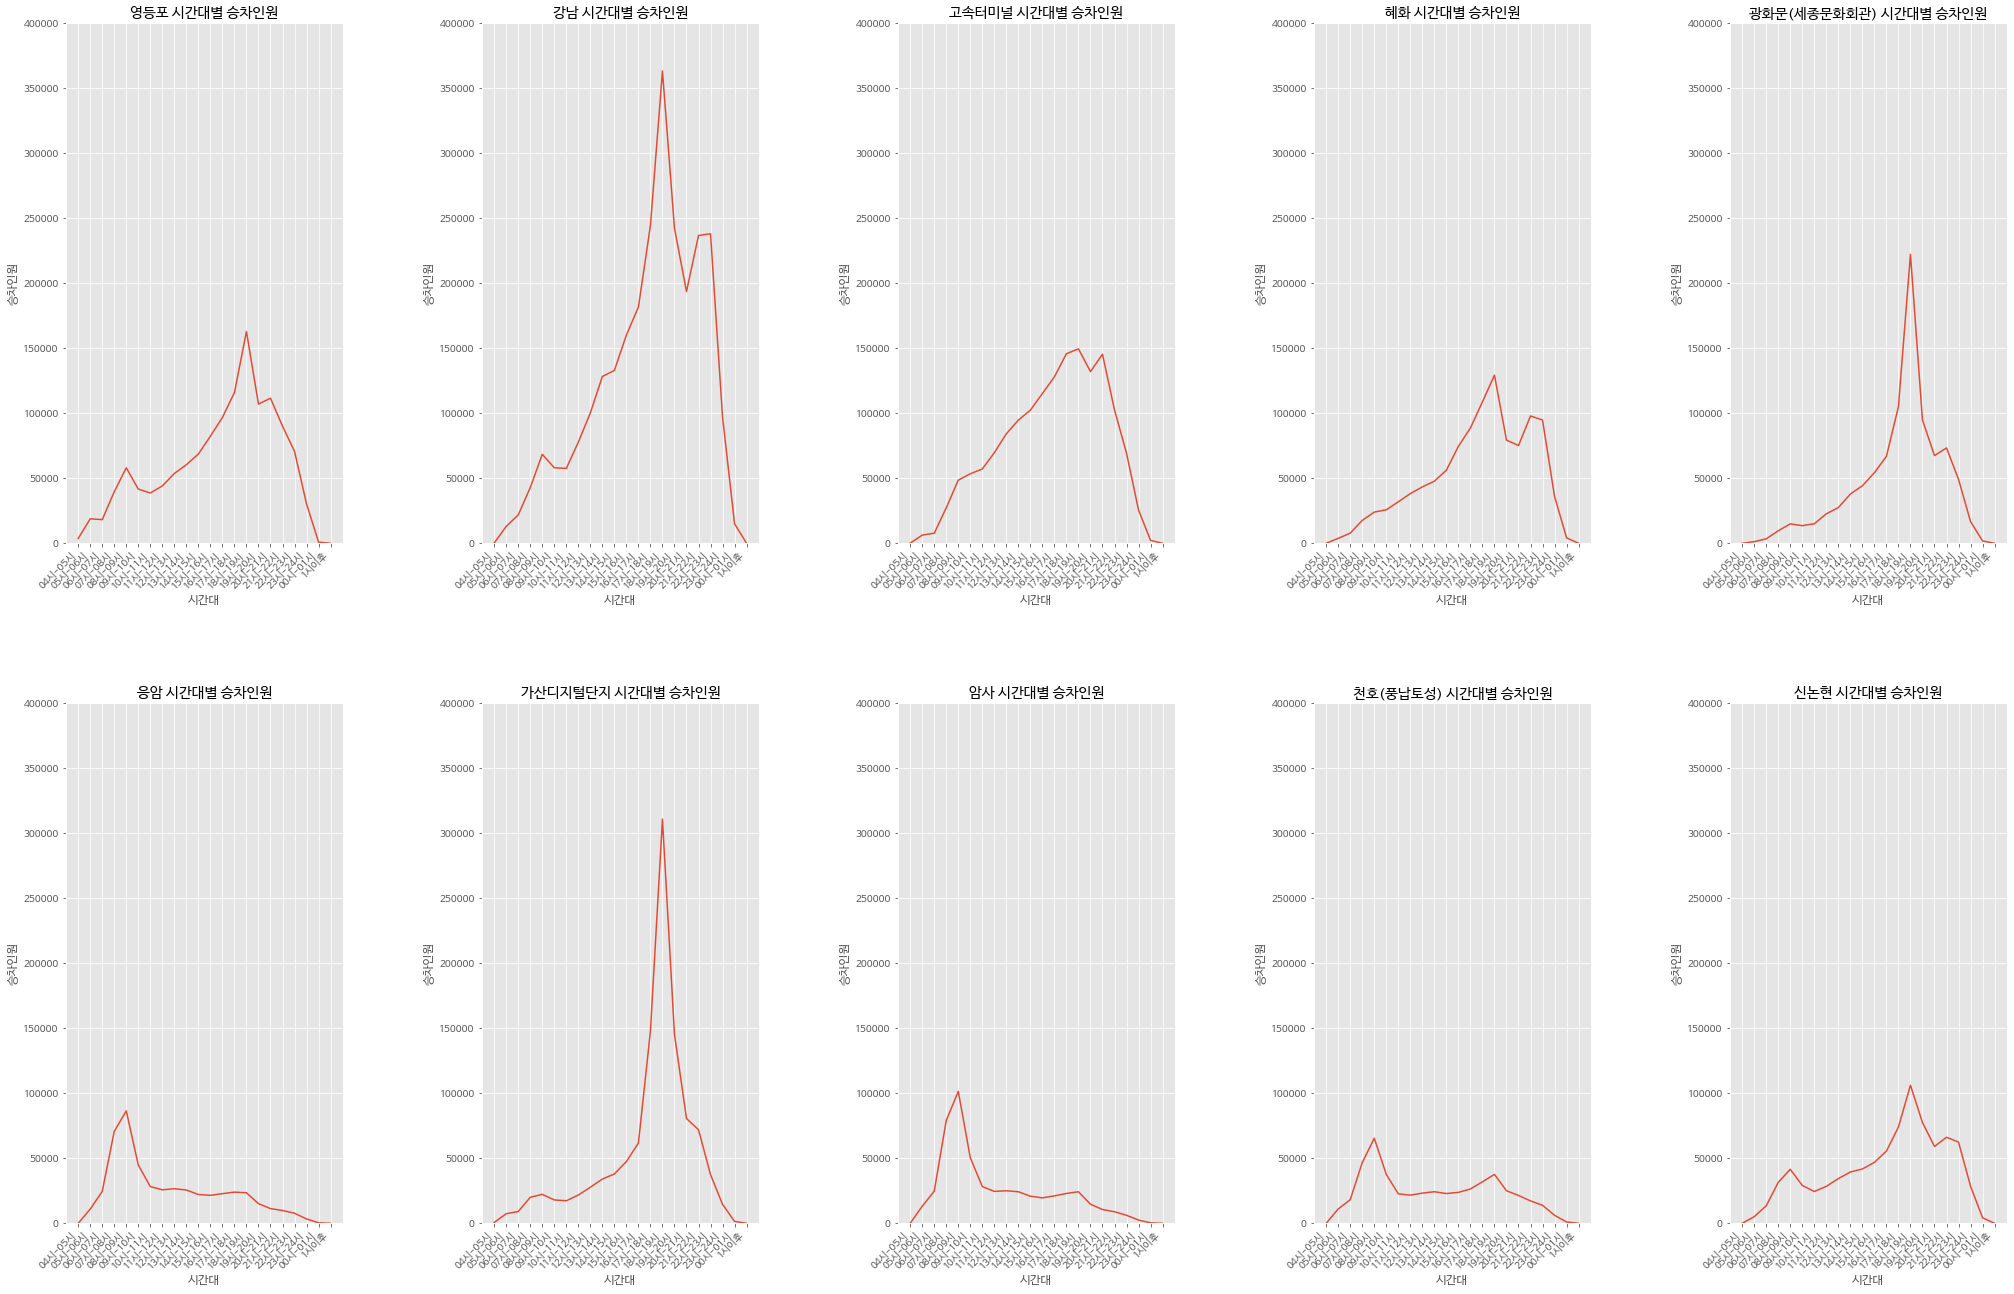

In [272]:
fig = plt.figure(figsize=(30,20))

# 9개의 서브 플롯
ax1 = fig.add_subplot(2,5,1)

ax1.plot(df_in_1.index, df_in_1['승차인원'])
ax1.set_xlabel('시간대')
ax1.set_ylabel('승차인원')
ax1.set_xticks(range(len(df_in_1.index)))
ax1.set_xticklabels(df_in_1.index, rotation=45, ha='right')
ax1.set_title('영등포 시간대별 승차인원')
ax1.set_ylim(0, 400000)
ax1.grid(True)

ax2 = fig.add_subplot(2,5,2)
ax2.plot(df_in_2.index, df_in_2['승차인원'])
ax2.set_xlabel('시간대')
ax2.set_ylabel('승차인원')
ax2.set_xticks(range(len(df_in_2.index)))
ax2.set_xticklabels(df_in_2.index, rotation=45, ha='right')
ax2.set_title('강남 시간대별 승차인원')
ax2.set_ylim(0, 400000)
ax2.grid(True)

ax3 = fig.add_subplot(2,5,3)
ax3.plot(df_in_3.index, df_in_3['승차인원'])
ax3.set_xlabel('시간대')
ax3.set_ylabel('승차인원')
ax3.set_xticks(range(len(df_in_3.index)))
ax3.set_xticklabels(df_in_3.index, rotation=45, ha='right')
ax3.set_title('고속터미널 시간대별 승차인원')
ax3.set_ylim(0, 400000)
ax3.grid(True)

ax4 = fig.add_subplot(2,5,4)
ax4.plot(df_in_4.index, df_in_4['승차인원'])
ax4.set_xlabel('시간대')
ax4.set_ylabel('승차인원')
ax4.set_xticks(range(len(df_in_4.index)))
ax4.set_xticklabels(df_in_4.index, rotation=45, ha='right')
ax4.set_title('혜화 시간대별 승차인원')
ax4.set_ylim(0, 400000)
ax4.grid(True)

ax5 = fig.add_subplot(2,5,5)
ax5.plot(df_in_5.index, df_in_5['승차인원'])
ax5.set_xlabel('시간대')
ax5.set_ylabel('승차인원')
ax5.set_xticks(range(len(df_in_5.index)))
ax5.set_xticklabels(df_in_5.index, rotation=45, ha='right')
ax5.set_title('광화문(세종문화회관) 시간대별 승차인원')
ax5.set_ylim(0, 400000)
ax5.grid(True)

ax6 = fig.add_subplot(2,5,6)
ax6.plot(df_in_6.index, df_in_6['승차인원'])
ax6.set_xlabel('시간대')
ax6.set_ylabel('승차인원')
ax6.set_xticks(range(len(df_in_6.index)))
ax6.set_xticklabels(df_in_6.index, rotation=45, ha='right')
ax6.set_title('응암 시간대별 승차인원')
ax6.set_ylim(0, 400000)
ax6.grid(True)

ax7 = fig.add_subplot(2,5,7)
ax7.plot(df_in_7.index, df_in_7['승차인원'])
ax7.set_xlabel('시간대')
ax7.set_ylabel('승차인원')
ax7.set_xticks(range(len(df_in_7.index)))
ax7.set_xticklabels(df_in_7.index, rotation=45, ha='right')
ax7.set_title('가산디지털단지 시간대별 승차인원')
ax7.set_ylim(0, 400000)
ax7.grid(True)

ax8 = fig.add_subplot(2,5,8)
ax8.plot(df_in_8.index, df_in_8['승차인원'])
ax8.set_xlabel('시간대')
ax8.set_ylabel('승차인원')
ax8.set_xticks(range(len(df_in_8.index)))
ax8.set_xticklabels(df_in_8.index, rotation=45, ha='right')
ax8.set_title('암사 시간대별 승차인원')
ax8.set_ylim(0, 400000)
ax8.grid(True)

ax9 = fig.add_subplot(2,5,9)
ax9.plot(df_in_cheonho.index, df_in_cheonho['승차인원'])
ax9.set_xlabel('시간대')
ax9.set_ylabel('승차인원')
ax9.set_xticks(range(len(df_in_cheonho.index)))
ax9.set_xticklabels(df_in_cheonho.index, rotation=45, ha='right')
ax9.set_title('천호(풍납토성) 시간대별 승차인원')
ax9.set_ylim(0, 400000)
ax9.grid(True)

ax10 = fig.add_subplot(2,5,10)
ax10.plot(df_in_9.index, df_in_9['승차인원'])
ax10.set_xlabel('시간대')
ax10.set_ylabel('승차인원')
ax10.set_xticks(range(len(df_in_9.index)))
ax10.set_xticklabels(df_in_9.index, rotation=45, ha='right')
ax10.set_title('신논현 시간대별 승차인원')
ax10.set_ylim(0, 400000)
ax10.grid(True)

plt.tight_layout(pad = 8)
plt.show()

### 2. 호선별로 가장 많이 하차하는 역은?

In [273]:
df_off = df.groupby(['호선명', '지하철역'], group_keys=False)[df.columns[df.columns.str.contains('하차')]].mean()
df_off.head()

04시-05시 하차인원  05시-06시 하차인원  06시-07시 하차인원  07시-08시 하차인원  \
호선명 지하철역                                                              
1호선 가능           6.050000   1626.133333   4374.083333   5366.183333   
    가산디지털단지      6.133333   1980.583333  10941.750000  46802.533333   
    간석          10.866667   1158.600000   2589.983333   4138.650000   
    개봉           8.633333   5494.800000  11855.966667  16530.883333   
    관악           1.800000   1931.716667   4626.450000   6062.566667   

              08시-09시 하차인원  09시-10시 하차인원  10시-11시 하차인원  11시-12시 하차인원  \
호선명 지하철역                                                               
1호선 가능        16129.050000   8418.733333   6858.433333   6510.516667   
    가산디지털단지  153276.750000  72598.500000  21970.766667  16996.766667   
    간석         8974.150000   5961.950000   5196.216667   5690.166667   
    개봉        26158.450000  20669.783333  17667.533333  20241.466667   
    관악        10607.266667  11114.666667  10735.233333   8128.400000   

             12시-13시 하차인원  13시-14시 하차인원  ...  16시-17시 하차인원  17시-18시 하차인원  \
호선명 지하철역                                 ...                               
1호선 가능        7152.233333   8397.616667  ...  11731.216667  14506.450000   
    가산디지털단지  16409.233333  17653.733333  ...  18747.833333  23332.466667   
    간석        6616.683333   7212.183333  ...  11038.183333  14301.233333   
    개봉       24447.716667  24229.850000  ...  43570.266667  59967.050000   
    관악        8069.283333   7915.516667  ...  11694.333333  15376.666667   

             18시-19시 하차인원  19시-20시 하차인원  20시-21시 하차인원  21시-22시 하차인원  \
호선명 지하철역                                                              
1호선 가능       19975.616667  19968.933333  13216.083333   9974.333333   
    가산디지털단지  27912.033333  22441.483333  13175.716667  13044.050000   
    간석       19304.766667  19758.183333  12610.466667  10974.983333   
    개봉       89897.233333  78656.183333  48984.700000  44434.883333   
    관악       27496.433333  24178.633333  14773.550000  14446.850000   

             22시-23시 하차인원  23시-24시 하차인원  00시-01시 하차인원   1시이후 하차  
호선명 지하철역                                                         
1호선 가능        9940.933333   6906.650000   1916.666667  1.650000  
    가산디지털단지  11600.800000   6686.566667   1090.016667  2.033333  
    간석       10211.350000   7005.550000   2437.116667  2.066667  
    개봉       39313.183333  24220.900000   3167.933333  2.283333  
    관악       12601.583333   8734.116667    980.500000  0.266667  

[5 rows x 22 columns]

In [274]:
# column에서 하차인원 제거
df_off.columns = df_off.columns.str.split(' ').str[0]

In [275]:
# df에 하루 총 하차인원 column추가
df_off['총 하차인원'] = df_off.sum(axis=1)
df_off.head()

04시-05시      05시-06시       06시-07시       07시-08시  \
호선명 지하철역                                                          
1호선 가능        6.050000  1626.133333   4374.083333   5366.183333   
    가산디지털단지   6.133333  1980.583333  10941.750000  46802.533333   
    간석       10.866667  1158.600000   2589.983333   4138.650000   
    개봉        8.633333  5494.800000  11855.966667  16530.883333   
    관악        1.800000  1931.716667   4626.450000   6062.566667   

                   08시-09시       09시-10시       10시-11시       11시-12시  \
호선명 지하철역                                                               
1호선 가능        16129.050000   8418.733333   6858.433333   6510.516667   
    가산디지털단지  153276.750000  72598.500000  21970.766667  16996.766667   
    간석         8974.150000   5961.950000   5196.216667   5690.166667   
    개봉        26158.450000  20669.783333  17667.533333  20241.466667   
    관악        10607.266667  11114.666667  10735.233333   8128.400000   

                  12시-13시       13시-14시  ...       17시-18시       18시-19시  \
호선명 지하철역                                 ...                               
1호선 가능        7152.233333   8397.616667  ...  14506.450000  19975.616667   
    가산디지털단지  16409.233333  17653.733333  ...  23332.466667  27912.033333   
    간석        6616.683333   7212.183333  ...  14301.233333  19304.766667   
    개봉       24447.716667  24229.850000  ...  59967.050000  89897.233333   
    관악        8069.283333   7915.516667  ...  15376.666667  27496.433333   

                  19시-20시       20시-21시       21시-22시       22시-23시  \
호선명 지하철역                                                              
1호선 가능       19968.933333  13216.083333   9974.333333   9940.933333   
    가산디지털단지  22441.483333  13175.716667  13044.050000  11600.800000   
    간석       19758.183333  12610.466667  10974.983333  10211.350000   
    개봉       78656.183333  48984.700000  44434.883333  39313.183333   
    관악       24178.633333  14773.550000  14446.850000  12601.583333   

                  23시-24시      00시-01시      1시이후         총 하차인원  
호선명 지하철역                                                         
1호선 가능        6906.650000  1916.666667  1.650000  190483.066667  
    가산디지털단지   6686.566667  1090.016667  2.033333  530362.966667  
    간석        7005.550000  2437.116667  2.066667  171472.816667  
    개봉       24220.900000  3167.933333  2.283333  662729.900000  
    관악        8734.116667   980.500000  0.266667  217357.950000  

[5 rows x 23 columns]

In [276]:
# 하루 총 이용객이 300보다 작은 일자의 데이터 삭제
df_off.drop(df_off[df_off['총 하차인원']<=300].index, axis=0, inplace=True)

In [277]:
# 그래프를 그리기 위한 변수 생성
x1, x2, x3 = [], [], []

# 각 호선별 총 하차인원 top5 출력
for i in range(1, 10):
    df_off_i = df_off.xs(f'{i}호선',level='호선명').sort_values('총 하차인원', ascending=False).head(5)
    
    print(f'{i}호선')
    print(df_off_i[['총 하차인원']])
    print('-------------------------------------')
    
    # 그래프 값 저장
    x1.append(f'{i}호선')
    x2.append(df_off_i.index[0])
    x3.append(df_off_i['총 하차인원'][0])
    
    # 각 호선별 하차인원이 가장 많은 역저장
    globals()["df_off_{}".format(i)] = df_off.xs(f'{i}호선',level='호선명').sort_values('총 하차인원', ascending=False).head(5)

1호선
            총 하차인원
지하철역              
영등포   1.370517e+06
수원    1.290490e+06
용산    1.119825e+06
부평    1.097105e+06
부천    1.095438e+06
-------------------------------------
2호선
                총 하차인원
지하철역                  
강남        2.692097e+06
잠실(송파구청)  2.202087e+06
홍대입구      2.140521e+06
신림        1.881374e+06
구로디지털단지   1.729752e+06
-------------------------------------
3호선
                    총 하차인원
지하철역                      
고속터미널         1.507880e+06
양재(서초구청)      1.177906e+06
연신내           1.094582e+06
압구정           9.954333e+05
남부터미널(예술의전당)  9.516261e+05
-------------------------------------
4호선
                총 하차인원
지하철역                  
혜화        1.118091e+06
수유(강북구청)  1.067236e+06
명동        9.638384e+05
충무로       8.491708e+05
창동        8.475764e+05
-------------------------------------
5호선
                    총 하차인원
지하철역                      
광화문(세종문화회관)  981213.916667
까치산          803599.716667
화곡           765358.466667
오목교(목동운동장앞)  720031.550000
여의도          712766.41

In [278]:
# 호선별 가장 많이 하차하는 역을 데이터 프레임으로 저장
df_off_max = pd.DataFrame({'호선명' : x1, '지하철역' : x2, '총 하차인원' : x3})

In [279]:
df_off_max

,호선명,지하철역,총 하차인원
0,1호선,영등포,1.370517e+06
1,2호선,강남,2.692097e+06
2,3호선,고속터미널,1.507880e+06
3,4호선,혜화,1.118091e+06
4,5호선,광화문(세종문화회관),9.812139e+05
5,6호선,응암,4.956977e+05
6,7호선,가산디지털단지,1.128070e+06
7,8호선,천호(풍납토성),5.643183e+05
8,9호선,신논현,8.789063e+05


Text(0.5, 1.0, '호선별 최다 하차역 총 하차인원')

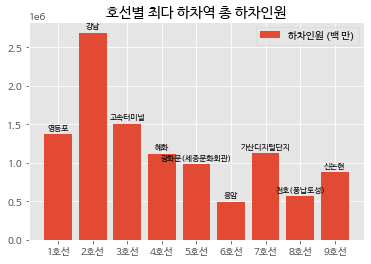

In [280]:
# 그래프
plt.bar(df_off_max['호선명'],df_off_max['총 하차인원'], label="하차인원 (백 만)")
for i in range(0,9):
    plt.text(i,df_off_max.iloc[i]['총 하차인원']+80000,df_off_max.iloc[i]['지하철역'], va='center', ha='center', size=8)

plt.legend()
plt.title('호선별 최다 하차역 총 하차인원')

- 이 역의 가장 혼잡한 시간대는?

In [281]:
df_off_amsa = df_off_8.iloc[[4]].T[:-1]
df_off_amsa.columns = ['하차인원']

In [282]:
# 그래프를 그리기 위한 전치, column이름 변경
df_off_1 = df_off_1.iloc[[0]].T[:-1]
df_off_1.columns = ['하차인원']

df_off_2 = df_off_2.iloc[[0]].T[:-1]
df_off_2.columns = ['하차인원']

df_off_3 = df_off_3.iloc[[0]].T[:-1]
df_off_3.columns = ['하차인원']

df_off_4 = df_off_4.iloc[[0]].T[:-1]
df_off_4.columns = ['하차인원']

df_off_5 = df_off_5.iloc[[0]].T[:-1]
df_off_5.columns = ['하차인원']

df_off_6 = df_off_6.iloc[[0]].T[:-1]
df_off_6.columns = ['하차인원']

df_off_7 = df_off_7.iloc[[0]].T[:-1]
df_off_7.columns = ['하차인원']

df_off_8 = df_off_8.iloc[[0]].T[:-1]
df_off_8.columns = ['하차인원']

df_off_9 = df_off_9.iloc[[0]].T[:-1]
df_off_9.columns = ['하차인원']

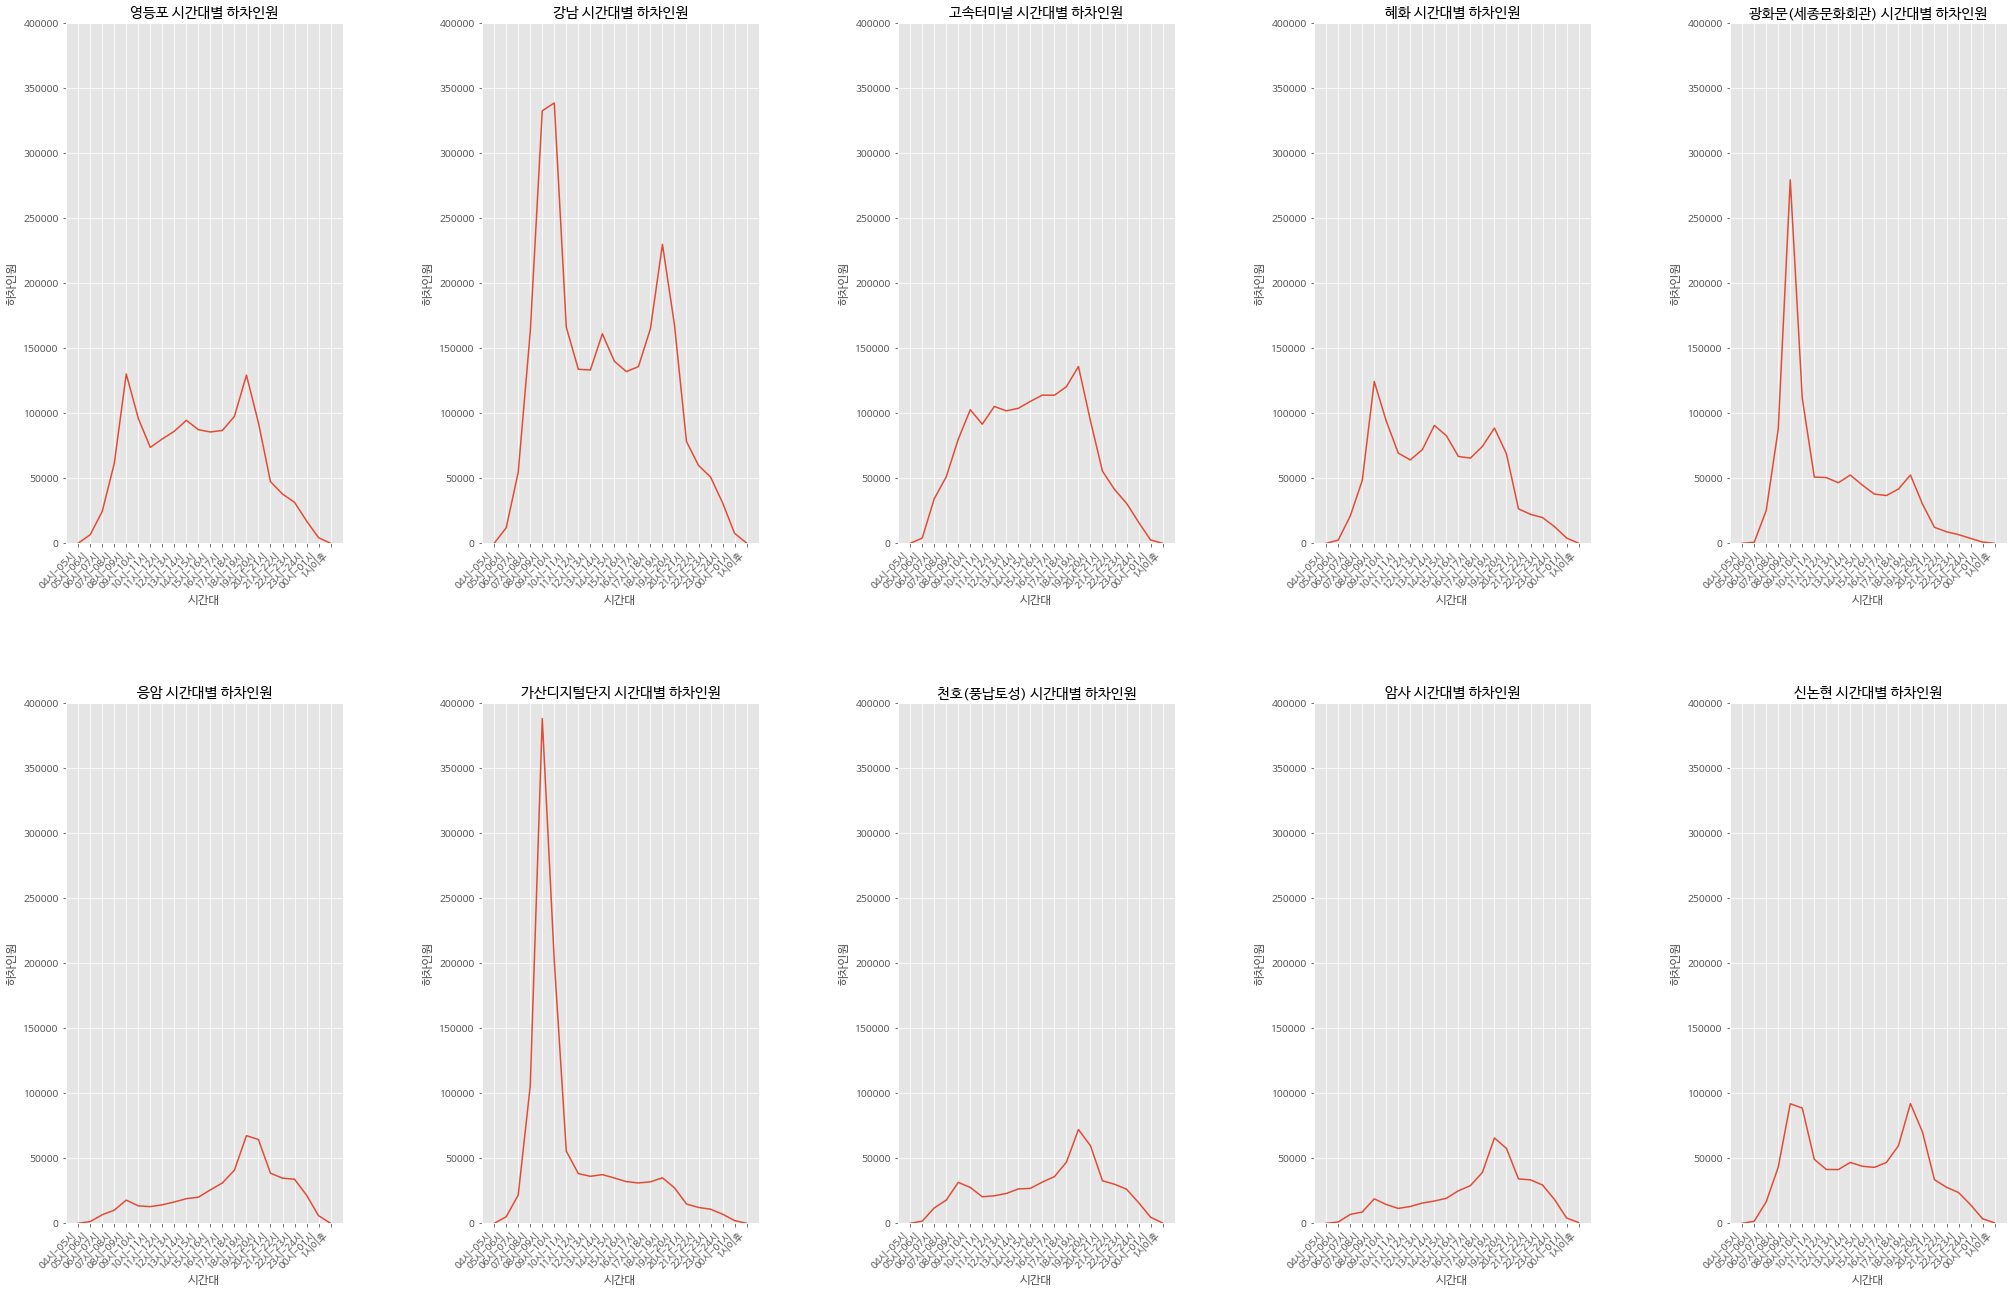

In [283]:
fig = plt.figure(figsize=(30,20))

# 9개의 서브 플롯
ax1 = fig.add_subplot(2,5,1)

ax1.plot(df_off_1.index, df_off_1['하차인원'])
ax1.set_xlabel('시간대')
ax1.set_ylabel('하차인원')
ax1.set_xticks(range(len(df_off_1.index)))
ax1.set_xticklabels(df_off_1.index, rotation=45, ha='right')
ax1.set_title('영등포 시간대별 하차인원')
ax1.set_ylim(0, 400000)
ax1.grid(True)

ax2 = fig.add_subplot(2,5,2)
ax2.plot(df_off_2.index, df_off_2['하차인원'])
ax2.set_xlabel('시간대')
ax2.set_ylabel('하차인원')
ax2.set_xticks(range(len(df_off_2.index)))
ax2.set_xticklabels(df_off_2.index, rotation=45, ha='right')
ax2.set_title('강남 시간대별 하차인원')
ax2.set_ylim(0, 400000)
ax2.grid(True)

ax3 = fig.add_subplot(2,5,3)
ax3.plot(df_off_3.index, df_off_3['하차인원'])
ax3.set_xlabel('시간대')
ax3.set_ylabel('하차인원')
ax3.set_xticks(range(len(df_off_3.index)))
ax3.set_xticklabels(df_off_3.index, rotation=45, ha='right')
ax3.set_title('고속터미널 시간대별 하차인원')
ax3.set_ylim(0, 400000)
ax3.grid(True)

ax4 = fig.add_subplot(2,5,4)
ax4.plot(df_off_4.index, df_off_4['하차인원'])
ax4.set_xlabel('시간대')
ax4.set_ylabel('하차인원')
ax4.set_xticks(range(len(df_off_4.index)))
ax4.set_xticklabels(df_off_4.index, rotation=45, ha='right')
ax4.set_title('혜화 시간대별 하차인원')
ax4.set_ylim(0, 400000)
ax4.grid(True)

ax5 = fig.add_subplot(2,5,5)
ax5.plot(df_off_5.index, df_off_5['하차인원'])
ax5.set_xlabel('시간대')
ax5.set_ylabel('하차인원')
ax5.set_xticks(range(len(df_off_5.index)))
ax5.set_xticklabels(df_off_5.index, rotation=45, ha='right')
ax5.set_title('광화문(세종문화회관) 시간대별 하차인원')
ax5.set_ylim(0, 400000)
ax5.grid(True)

ax6 = fig.add_subplot(2,5,6)
ax6.plot(df_off_6.index, df_off_6['하차인원'])
ax6.set_xlabel('시간대')
ax6.set_ylabel('하차인원')
ax6.set_xticks(range(len(df_off_6.index)))
ax6.set_xticklabels(df_off_6.index, rotation=45, ha='right')
ax6.set_title('응암 시간대별 하차인원')
ax6.set_ylim(0, 400000)
ax6.grid(True)

ax7 = fig.add_subplot(2,5,7)
ax7.plot(df_off_7.index, df_off_7['하차인원'])
ax7.set_xlabel('시간대')
ax7.set_ylabel('하차인원')
ax7.set_xticks(range(len(df_off_7.index)))
ax7.set_xticklabels(df_off_7.index, rotation=45, ha='right')
ax7.set_title('가산디지털단지 시간대별 하차인원')
ax7.set_ylim(0, 400000)
ax7.grid(True)

ax8 = fig.add_subplot(2,5,8)
ax8.plot(df_off_8.index, df_off_8['하차인원'])
ax8.set_xlabel('시간대')
ax8.set_ylabel('하차인원')
ax8.set_xticks(range(len(df_off_8.index)))
ax8.set_xticklabels(df_off_8.index, rotation=45, ha='right')
ax8.set_title('천호(풍납토성) 시간대별 하차인원')
ax8.set_ylim(0, 400000)
ax8.grid(True)

ax9 = fig.add_subplot(2,5,9)
ax9.plot(df_off_amsa.index, df_off_amsa['하차인원'])
ax9.set_xlabel('시간대')
ax9.set_ylabel('하차인원')
ax9.set_xticks(range(len(df_off_amsa.index)))
ax9.set_xticklabels(df_off_amsa.index, rotation=45, ha='right')
ax9.set_title('암사 시간대별 하차인원')
ax9.set_ylim(0, 400000)
ax9.grid(True)

ax10 = fig.add_subplot(2,5,10)
ax10.plot(df_off_9.index, df_off_9['하차인원'])
ax10.set_xlabel('시간대')
ax10.set_ylabel('하차인원')
ax10.set_xticks(range(len(df_off_9.index)))
ax10.set_xticklabels(df_off_9.index, rotation=45, ha='right')
ax10.set_title('신논현 시간대별 하차인원')
ax10.set_ylim(0, 400000)
ax10.grid(True)

plt.tight_layout(pad = 8)
plt.show()

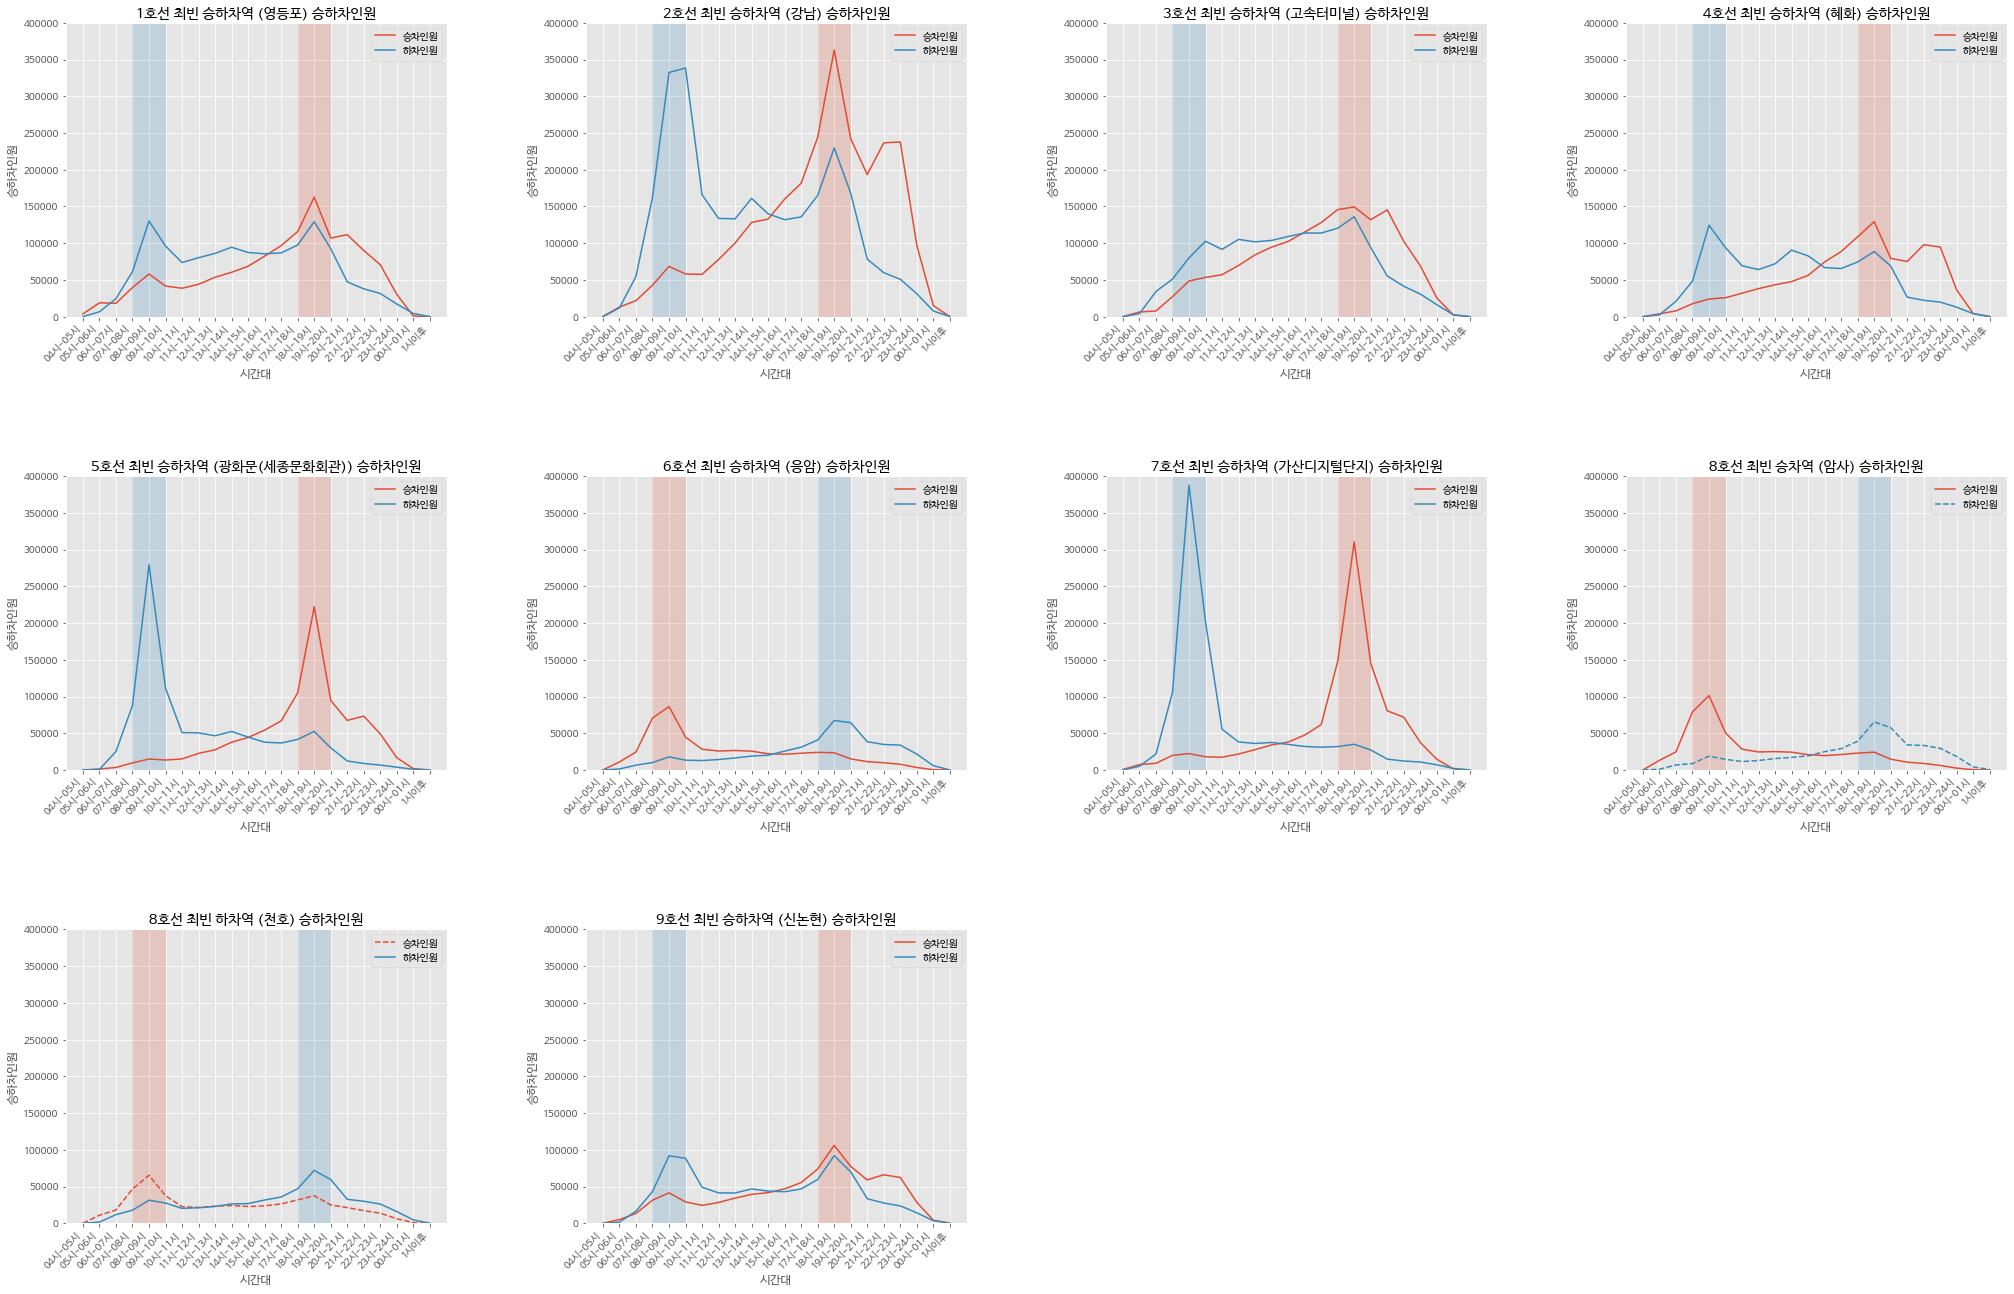

In [293]:
fig = plt.figure(figsize=(30,20))

# 9개의 서브 플롯
ax1 = fig.add_subplot(3,4,1)
ax1.plot(df_in_1.index, df_in_1['승차인원'], label="승차인원")
ax1.plot(df_off_1.index, df_off_1['하차인원'], label="하차인원")
ax1.set_xlabel('시간대')
ax1.set_ylabel('승하차인원')
ax1.set_xticks(range(len(df_in_1.index)))
ax1.set_xticklabels(df_in_1.index, rotation=45, ha='right')
ax1.set_title('1호선 최빈 승하차역 (영등포) 승하차인원')
ax1.set_ylim(0, 400000)
ax1.axvspan(3, 5, facecolor='#348abd', alpha=0.2)
ax1.axvspan(13,15, facecolor='#e24a33', alpha=0.2)
ax1.grid(True)
plt.legend()

ax2 = fig.add_subplot(3,4,2)
ax2.plot(df_in_2.index, df_in_2['승차인원'], label="승차인원")
ax2.plot(df_off_2.index, df_off_2['하차인원'], label="하차인원")
ax2.set_xlabel('시간대')
ax2.set_ylabel('승하차인원')
ax2.set_xticks(range(len(df_in_2.index)))
ax2.set_xticklabels(df_in_2.index, rotation=45, ha='right')
ax2.set_title('2호선 최빈 승하차역 (강남) 승하차인원')
ax2.set_ylim(0, 400000)
ax2.axvspan(3, 5, facecolor='#348abd', alpha=0.2)
ax2.axvspan(13,15, facecolor='#e24a33', alpha=0.2)
ax2.grid(True)
plt.legend()


ax3 = fig.add_subplot(3,4,3)
ax3.plot(df_in_3.index, df_in_3['승차인원'], label="승차인원")
ax3.plot(df_off_3.index, df_off_3['하차인원'], label="하차인원")
ax3.set_xlabel('시간대')
ax3.set_ylabel('승하차인원')
ax3.set_xticks(range(len(df_in_3.index)))
ax3.set_xticklabels(df_in_3.index, rotation=45, ha='right')
ax3.set_title('3호선 최빈 승하차역 (고속터미널) 승하차인원')
ax3.set_ylim(0, 400000)
ax3.axvspan(3, 5, facecolor='#348abd', alpha=0.2)
ax3.axvspan(13,15,  facecolor='#e24a33', alpha=0.2)
ax3.grid(True)
plt.legend()


ax4 = fig.add_subplot(3,4,4)
ax4.plot(df_in_4.index, df_in_4['승차인원'], label="승차인원")
ax4.plot(df_off_4.index, df_off_4['하차인원'], label="하차인원")
ax4.set_xlabel('시간대')
ax4.set_ylabel('승하차인원')
ax4.set_xticks(range(len(df_in_4.index)))
ax4.set_xticklabels(df_in_4.index, rotation=45, ha='right')
ax4.set_title('4호선 최빈 승하차역 (혜화) 승하차인원')
ax4.set_ylim(0, 400000)
ax4.axvspan(3, 5, facecolor='#348abd', alpha=0.2)
ax4.axvspan(13,15,  facecolor='#e24a33', alpha=0.2)
ax4.grid(True)
plt.legend()


ax5 = fig.add_subplot(3,4,5)
ax5.plot(df_in_5.index, df_in_5['승차인원'], label="승차인원")
ax5.plot(df_off_5.index, df_off_5['하차인원'], label="하차인원")
ax5.set_xlabel('시간대')
ax5.set_ylabel('승하차인원')
ax5.set_xticks(range(len(df_in_5.index)))
ax5.set_xticklabels(df_in_5.index, rotation=45, ha='right')
ax5.set_title('5호선 최빈 승하차역 (광화문(세종문화회관)) 승하차인원')
ax5.set_ylim(0, 400000)
ax5.axvspan(3, 5, facecolor='#348abd', alpha=0.2)
ax5.axvspan(13,15,  facecolor='#e24a33', alpha=0.2)
ax5.grid(True)
plt.legend()


ax6 = fig.add_subplot(3,4,6)
ax6.plot(df_in_6.index, df_in_6['승차인원'], label="승차인원")
ax6.plot(df_off_6.index, df_off_6['하차인원'], label="하차인원")
ax6.set_xlabel('시간대')
ax6.set_ylabel('승하차인원')
ax6.set_xticks(range(len(df_in_6.index)))
ax6.set_xticklabels(df_in_6.index, rotation=45, ha='right')
ax6.set_title('6호선 최빈 승하차역 (응암) 승하차인원')
ax6.set_ylim(0, 400000)
ax6.axvspan(3, 5,  facecolor='#e24a33', alpha=0.2)
ax6.axvspan(13,15, facecolor='#348abd', alpha=0.2)
ax6.grid(True)
plt.legend()

ax7 = fig.add_subplot(3,4,7)
ax7.plot(df_in_7.index, df_in_7['승차인원'], label="승차인원")
ax7.plot(df_off_7.index, df_off_7['하차인원'], label="하차인원")
ax7.set_xlabel('시간대')
ax7.set_ylabel('승하차인원')
ax7.set_xticks(range(len(df_in_7.index)))
ax7.set_xticklabels(df_in_7.index, rotation=45, ha='right')
ax7.set_title('7호선 최빈 승하차역 (가산디지털단지) 승하차인원')
ax7.set_ylim(0, 400000)
ax7.axvspan(3, 5, facecolor='#348abd', alpha=0.2)
ax7.axvspan(13,15,  facecolor='#e24a33', alpha=0.2)
ax7.grid(True)
plt.legend()

ax8_1 = fig.add_subplot(3,4,8)
ax8_1.plot(df_in_8.index, df_in_8['승차인원'], label="승차인원")
ax8_1.plot(df_off_amsa.index, df_off_amsa['하차인원'], label="하차인원", linestyle='dashed')
ax8_1.set_xlabel('시간대')
ax8_1.set_ylabel('승하차인원')
ax8_1.set_xticks(range(len(df_in_8.index)))
ax8_1.set_xticklabels(df_in_8.index, rotation=45, ha='right')
ax8_1.set_title('8호선 최빈 승차역 (암사) 승하차인원')
ax8_1.set_ylim(0, 400000)
ax8_1.axvspan(3, 5, facecolor='#e24a33', alpha=0.2)
ax8_1.axvspan(13,15, facecolor='#348abd', alpha=0.2)
ax8_1.grid(True)
plt.legend()

ax8_2 = fig.add_subplot(3,4,9)
ax8_2.plot(df_in_cheonho.index, df_in_cheonho['승차인원'], label="승차인원", linestyle='dashed')
ax8_2.plot(df_off_8.index, df_off_8['하차인원'], label="하차인원")
ax8_2.set_xlabel('시간대')
ax8_2.set_ylabel('승하차인원')
ax8_2.set_xticks(range(len(df_in_8.index)))
ax8_2.set_xticklabels(df_in_8.index, rotation=45, ha='right')
ax8_2.set_title('8호선 최빈 하차역 (천호) 승하차인원')
ax8_2.set_ylim(0, 400000)
ax8_2.axvspan(3, 5, facecolor='#e24a33', alpha=0.2)
ax8_2.axvspan(13,15, facecolor='#348abd', alpha=0.2)
ax8_2.grid(True)
plt.legend()


ax9 = fig.add_subplot(3,4,10)
ax9.plot(df_in_9.index, df_in_9['승차인원'], label="승차인원")
ax9.plot(df_off_9.index, df_off_9['하차인원'], label="하차인원")
ax9.set_xlabel('시간대')
ax9.set_ylabel('승하차인원')
ax9.set_xticks(range(len(df_in_9.index)))
ax9.set_xticklabels(df_in_9.index, rotation=45, ha='right')
ax9.set_title('9호선 최빈 승하차역 (신논현) 승하차인원')
ax9.set_ylim(0, 400000)
ax9.axvspan(3, 5, facecolor='#348abd', alpha=0.2)
ax9.axvspan(13,15,  facecolor='#e24a33', alpha=0.2)
ax9.grid(True)
plt.legend()

plt.tight_layout(pad = 8)
plt.show()

### 3. 혼잡도 계산

### 4. 시각화

## 3. 혼잡도와 배차시간 사이의 관계

In [285]:
# 데이터 로드


### 1. 혼잡도가 높은 역에 대한 혼잡한 시간대의 배차간격은?

### 2. 시각화 - 혼잡도(선그래프)와 배차간격(막대그래프) 결합